# Importing the Important Libraries

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

C:\Users\Robinhood\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading the Dataset

In [2]:
iris=pd.read_csv("iris.csv")

# Reading the Dataset

In [3]:
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Shape of the Dataset

In [4]:
iris.shape

(150, 6)

# Checking No. of Classes in Iris Dataset

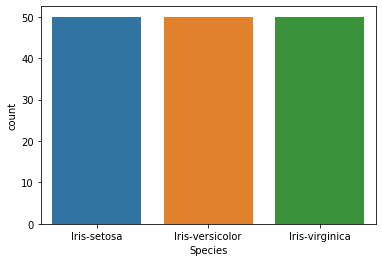

In [5]:
sns.countplot(x="Species", data=iris)

In [6]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Checking the correlation

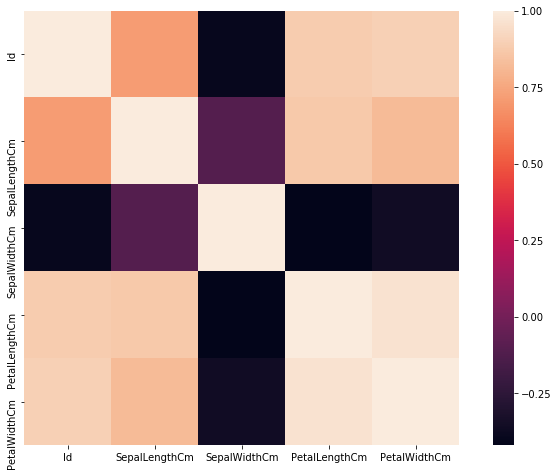

In [7]:
corrmat=iris.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, square=True)

In [8]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Checking if there are any null values in the dataset

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
factor=pd.factorize(iris['Species'])
iris.Species=factor[0]
definitions=factor[1]
print(iris.Species.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64
Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [11]:
iris.drop("Id",axis=1, inplace=True)

# Training the model using Deep learning

In [12]:
X=iris.drop("Species", axis=1)
y=iris["Species"]

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=1)

C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feature Scaling

In [14]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building an ANN model with 1 Dense Layer

In [15]:
model=Sequential()
model.add(Dense(8, input_dim=4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# Training an ANN model

In [16]:
history=model.fit(X_train, y_train, validation_split=0.1, epochs=200, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 12 samples
Epoch 1/200
100/100 [==============================] - 10s 101ms/step - loss: 1.1069 - acc: 0.3100 - val_loss: 0.7556 - val_acc: 0.1667
Epoch 2/200
100/100 [==============================] - 0s 355us/step - loss: 1.0774 - acc: 0.3100 - val_loss: 0.7268 - val_acc: 0.1667
Epoch 3/200
100/100 [==============================] - 0s 240us/step - loss: 1.0448 - acc: 0.3100 - val_loss: 0.6972 - val_acc: 0.2500
Epoch 4/200
100/100 [==============================] - 0s 160us/step - loss: 1.0159 - acc: 0.3100 - val_loss: 0.6677 - val_acc: 0.2500
Epoch 5/200
100/100 [==============================] - 0s 160us/step - loss: 0.9853 - acc: 0.3100 - val_loss: 0.6383 - val_acc: 0.2500
Epoch 6/200
100/100 [==============================] - 0s 160us/step - loss: 0.9549 - acc: 0.3100 - val_loss: 0.6097 - val_acc: 0.2500
Epoch 7/200
100/100 [==============================] - 0s 80us/step - loss: 0.9247 - acc: 0.3100

100/100 [==============================] - 0s 80us/step - loss: -0.5772 - acc: 0.4800 - val_loss: -1.0526 - val_acc: 0.5000
Epoch 59/200
100/100 [==============================] - 0s 80us/step - loss: -0.6070 - acc: 0.5100 - val_loss: -1.0872 - val_acc: 0.5000
Epoch 60/200
100/100 [==============================] - 0s 80us/step - loss: -0.6364 - acc: 0.5400 - val_loss: -1.1234 - val_acc: 0.5000
Epoch 61/200
100/100 [==============================] - 0s 160us/step - loss: -0.6661 - acc: 0.5900 - val_loss: -1.1593 - val_acc: 0.5000
Epoch 62/200
100/100 [==============================] - ETA: 0s - loss: -0.6846 - acc: 0.62 - 0s 80us/step - loss: -0.6962 - acc: 0.5900 - val_loss: -1.1953 - val_acc: 0.5000
Epoch 63/200
100/100 [==============================] - 0s 80us/step - loss: -0.7258 - acc: 0.6000 - val_loss: -1.2301 - val_acc: 0.5000
Epoch 64/200
100/100 [==============================] - 0s 160us/step - loss: -0.7541 - acc: 0.6100 - val_loss: -1.2639 - val_acc: 0.5000
Epoch 65/200
1

100/100 [==============================] - 0s 160us/step - loss: -2.6313 - acc: 0.6500 - val_loss: -3.6679 - val_acc: 0.5000
Epoch 118/200
100/100 [==============================] - 0s 160us/step - loss: -2.6818 - acc: 0.6500 - val_loss: -3.7352 - val_acc: 0.5000
Epoch 119/200
100/100 [==============================] - 0s 160us/step - loss: -2.7369 - acc: 0.6500 - val_loss: -3.8051 - val_acc: 0.5000
Epoch 120/200
100/100 [==============================] - 0s 80us/step - loss: -2.7921 - acc: 0.6500 - val_loss: -3.8795 - val_acc: 0.5000
Epoch 121/200
100/100 [==============================] - 0s 80us/step - loss: -2.8498 - acc: 0.6500 - val_loss: -3.9589 - val_acc: 0.5000
Epoch 122/200
100/100 [==============================] - 0s 80us/step - loss: -2.9136 - acc: 0.6500 - val_loss: -4.0356 - val_acc: 0.5000
Epoch 123/200
100/100 [==============================] - 0s 80us/step - loss: -2.9668 - acc: 0.6500 - val_loss: -4.1096 - val_acc: 0.5000
Epoch 124/200
100/100 [======================

Epoch 176/200
100/100 [==============================] - 0s 80us/step - loss: -5.1918 - acc: 0.6500 - val_loss: -7.4998 - val_acc: 0.5000
Epoch 177/200
100/100 [==============================] - 0s 57us/step - loss: -5.2075 - acc: 0.6500 - val_loss: -7.5118 - val_acc: 0.5000
Epoch 178/200
100/100 [==============================] - 0s 80us/step - loss: -5.2367 - acc: 0.6500 - val_loss: -7.5024 - val_acc: 0.5000
Epoch 179/200
100/100 [==============================] - 0s 80us/step - loss: -5.2393 - acc: 0.6500 - val_loss: -7.5650 - val_acc: 0.5000
Epoch 180/200
100/100 [==============================] - 0s 80us/step - loss: -5.2531 - acc: 0.6500 - val_loss: -7.5992 - val_acc: 0.5000
Epoch 181/200
100/100 [==============================] - 0s 160us/step - loss: -5.2661 - acc: 0.6500 - val_loss: -7.6107 - val_acc: 0.5000
Epoch 182/200
100/100 [==============================] - 0s 80us/step - loss: -5.2721 - acc: 0.6500 - val_loss: -7.6479 - val_acc: 0.5000
Epoch 183/200
100/100 [==========

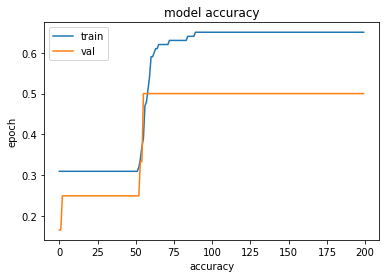

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

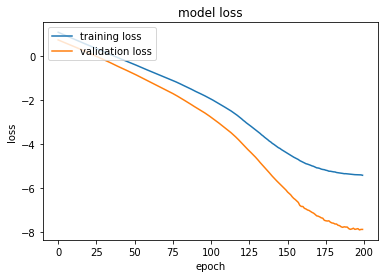

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

# Accuracy of the Dataset

In [19]:
_,accuracy=model.evaluate(X_train, y_train)
print("Accuracy:%.2f"%(accuracy*100))

112/112 [==============================] - 0s 71us/step
Accuracy:63.39


# Calculating F-1 score

In [20]:
test_loss=model.evaluate(X_test, y_test, verbose=0)

# Calculate evaluation Parameters
f1=f1_score(y_test, model.predict_classes(X_test), average='micro')

stats=pd.DataFrame({'Test accuracy':
                   round(test_loss[1]*100,3),
                   'F1 Score' : round(f1,3),
                   'Total Loss': round(test_loss[0],3)},
                  index=[0])

display(stats)

,Test accuracy,F1 Score,Total Loss
0,76.316,0.763,-3.749
